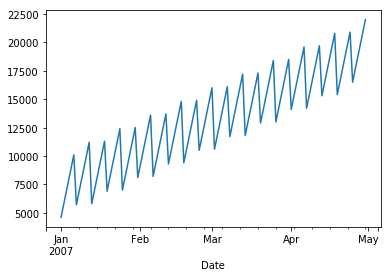

,Sales
Date,
2007-01-01,4600
2007-01-02,5700
2007-01-03,6800
2007-01-04,7900
2007-01-05,9000


In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df=pd.read_csv("C:\Users\Rawal Rawal\Downloads\salesdata.csv")

df.index=pd.to_datetime(df['Date'])
df['Sales'].plot()
del (df['Date'], df['Unnamed: 2'] , df['Unnamed: 3'], df['Unnamed: 4'])
plt.show()
df.head()

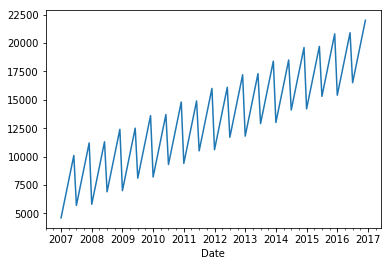

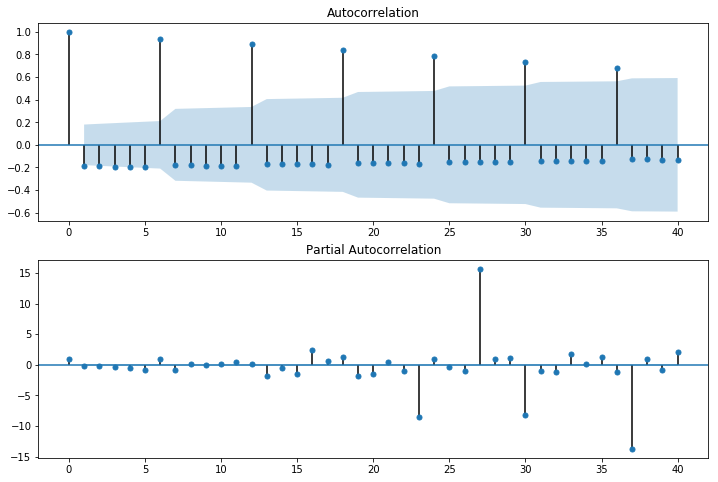

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  120
Model:             SARIMAX(0, 1, 6)x(0, 0, 1, 12)   Log Likelihood               -6718.171
Date:                            Wed, 27 Jun 2018   AIC                          13454.343
Time:                                    14:25:54   BIC                          13479.355
Sample:                                01-01-2007   HQIC                         13464.499
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -24.5373         -0        inf      0.000     -24.537     -24.537
ma.L1      -7.803e+13         -0   

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


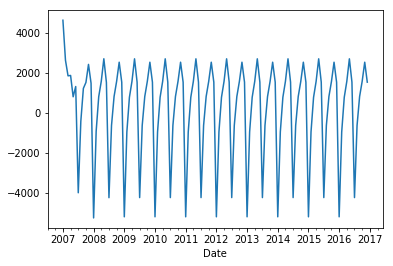

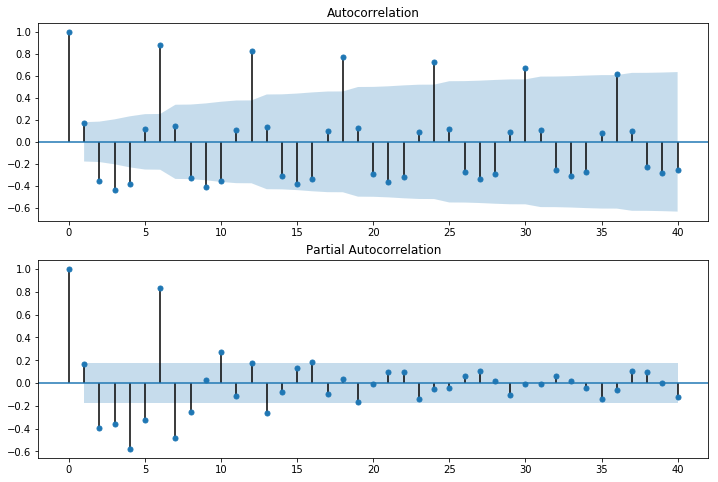

In [18]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales'].diff().dropna(), lags=40, ax=ax2)
plt.show()
model=sm.tsa.statespace.SARIMAX(endog=df['Sales'],order=(0,1,6),seasonal_order=(0,0,1,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())
results.resid.plot()
plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()
